Tutorial do professor Dr. Fabio Augusto Faria

In [1]:
# notebook adaptado de https://pbpython.com/market-basket-analysis.html
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/IA/Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 08:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 08:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 08:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 08:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 08:26,"3,39",17850.0,United Kingdom


In [3]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [4]:
countries = np.unique((df['Country'].values))
print(countries)

['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brazil' 'Canada'
 'Channel Islands' 'Cyprus' 'Czech Republic' 'Denmark' 'EIRE'
 'European Community' 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong'
 'Iceland' 'Israel' 'Italy' 'Japan' 'Lebanon' 'Lithuania' 'Malta'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'RSA' 'Saudi Arabia'
 'Singapore' 'Spain' 'Sweden' 'Switzerland' 'USA' 'United Arab Emirates'
 'United Kingdom' 'Unspecified']


In [5]:
countries.shape

(38,)

In [6]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [7]:
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,6 GIFT TAGS 50'S CHRISTMAS,...,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP ALPHABET DESIGN,WRAP CAROUSEL,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [8]:
basket['10 COLOUR SPACEBOY PEN'].values

array([ 0.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.,  0.,  0., 24.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       24.,  0.,  0., 24.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [9]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [10]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
print(frequent_itemsets)

     support                                           itemsets
0   0.071429                      (4 TRADITIONAL SPINNING TOPS)
1   0.096939                       (ALARM CLOCK BAKELIKE GREEN)
2   0.102041                        (ALARM CLOCK BAKELIKE PINK)
3   0.094388                         (ALARM CLOCK BAKELIKE RED)
4   0.081633                     (BAKING SET 9 PIECE RETROSPOT)
5   0.071429                     (CHILDRENS CUTLERY DOLLY GIRL)
6   0.099490                             (DOLLY GIRL LUNCH BOX)
7   0.096939                          (JUMBO BAG RED RETROSPOT)
8   0.076531                       (JUMBO BAG WOODLAND ANIMALS)
9   0.125000                           (LUNCH BAG APPLE DESIGN)
10  0.084184                      (LUNCH BAG DOLLY GIRL DESIGN)
11  0.153061                          (LUNCH BAG RED RETROSPOT)
12  0.119898                        (LUNCH BAG SPACEBOY DESIGN)
13  0.117347                               (LUNCH BAG WOODLAND)
14  0.142857                 (LUNCH BOX 

In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [12]:
rules.shape

(26, 9)

In [13]:
actual_rules = rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8) ]
print(actual_rules)

                                          antecedents  ... conviction
2                          (ALARM CLOCK BAKELIKE RED)  ...   5.568878
3                        (ALARM CLOCK BAKELIKE GREEN)  ...   4.916181
16                    (SET/6 RED SPOTTY PAPER PLATES)  ...   4.336735
18                    (SET/6 RED SPOTTY PAPER PLATES)  ...  21.556122
19                      (SET/6 RED SPOTTY PAPER CUPS)  ...   7.852041
20  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...  ...  34.489796
21  (SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...  ...   4.625850
22  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...  ...  34.897959

[8 rows x 9 columns]


In [14]:
actual_rules.shape

(8, 9)

In [15]:
actual_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041


In [16]:
for i in range(actual_rules.shape[0]):
  print(actual_rules.values[i])
  print('\n')

[frozenset({'ALARM CLOCK BAKELIKE RED'})
 frozenset({'ALARM CLOCK BAKELIKE GREEN'}) 0.09438775510204081
 0.09693877551020408 0.07908163265306123 0.8378378378378379
 8.642958748221908 0.06993179925031237 5.568877551020412]


[frozenset({'ALARM CLOCK BAKELIKE GREEN'})
 frozenset({'ALARM CLOCK BAKELIKE RED'}) 0.09693877551020408
 0.09438775510204081 0.07908163265306123 0.8157894736842106
 8.642958748221908 0.06993179925031237 4.916180758017496]


[frozenset({'SET/6 RED SPOTTY PAPER PLATES'})
 frozenset({'SET/20 RED RETROSPOT PAPER NAPKINS'}) 0.12755102040816327
 0.1326530612244898 0.10204081632653061 0.8 6.030769230769231
 0.08512078300708038 4.336734693877552]


[frozenset({'SET/6 RED SPOTTY PAPER PLATES'})
 frozenset({'SET/6 RED SPOTTY PAPER CUPS'}) 0.12755102040816327
 0.1377551020408163 0.12244897959183673 0.96 6.968888888888889
 0.10487817576009996 21.556122448979572]


[frozenset({'SET/6 RED SPOTTY PAPER CUPS'})
 frozenset({'SET/6 RED SPOTTY PAPER PLATES'}) 0.1377551020408163
 0.127

Implementation 

Total Rules

In [ ]:
basketTotal = (df
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basketTotal

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,20713,20713 wrongly marked,3 BIRDS CANVAS SCREEN,3 BLACK CATS W HEARTS BLANK CARD,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,...,sold as set on dotcom,sold as set on dotcom and amazon,sold as set/6 by dotcom,sold in set?,sold with wrong barcode,stock check,stock creditted wrongly,taig adjust,taig adjust no stock,temp adjustment,test,throw away,thrown away,thrown away-can't sell,thrown away-can't sell.,to push order througha s stock was,water damage,water damaged,website fixed,wet,wet boxes,wet damaged,wet pallet,wet rusty,wet/rusty,wet?,wrong barcode,wrong barcode (22467),wrong code,wrong code?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

-Australia

In [17]:
basketAustralia = (df[df['Country'] =="Australia"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basketAustralia 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 08:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 08:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 08:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 08:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,"0,85",12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,"2,1",12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,"4,15",12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,"4,15",12680.0,France


In [18]:
import matplotlib.pyplot
import matplotlib.pyplot as plt

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
cont =0
basket_sets = basketAustralia.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
#print(frequent_itemsets.sort_values(by='support',ascending=False))
#K-itensets ordenado por support
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support',ascending=False)
#print(frequent_itemsets_sorted)
rules = association_rules(frequent_itemsets_sorted, metric="lift", min_threshold=1)
#rules.head()
#rules.shape = (800,9)
actual_rules = rules[ (rules['lift'] >= 11) & (rules['confidence'] >= 0.8) ]
#print(actual_rules.sort_values(['lift', 'confidence']))
actual_rules_sorted = actual_rules.sort_values(['lift', 'confidence'],ascending=False)
#actual_rules_sorted.head()
actual_rules_sorted_reset = actual_rules_sorted.reset_index()    
valueAustralia = actual_rules_sorted_reset.sort_values(by='index')
#print(value)
print('numero de regras = ', valueAustralia.shape, '\n')

print("Produtos mais comprados em conjunto", '\n')

for i in range(valueAustralia.shape[0]):
  print("Antecedente: ",valueAustralia['antecedents'][i])
  print("Consequente: ", valueAustralia['consequents'][i])
  print("lift: ",valueAustralia['lift'][i])
  print("confianca: ", valueAustralia['confidence'][i])
  print("indice: ", valueAustralia['index'][i])

  print('\n')



numero de regras =  (346, 10) 

Produtos mais comprados em conjunto 

Antecedente:  frozenset({'DOLLY GIRL LUNCH BOX', 'SPACEBOY LUNCH BOX', 'HOMEMADE JAM SCENTED CANDLES'})
Consequente:  frozenset({'ROSES REGENCY TEACUP AND SAUCER', 'CIRCUS PARADE LUNCH BOX'})
lift:  14.25
confianca:  1.0
indice:  98


Antecedente:  frozenset({'ROSES REGENCY TEACUP AND SAUCER', 'CIRCUS PARADE LUNCH BOX', 'DOLLY GIRL LUNCH BOX'})
Consequente:  frozenset({'SPACEBOY LUNCH BOX', 'HOMEMADE JAM SCENTED CANDLES'})
lift:  14.25
confianca:  1.0
indice:  102


Antecedente:  frozenset({'ROSES REGENCY TEACUP AND SAUCER', 'CIRCUS PARADE LUNCH BOX', 'SPACEBOY LUNCH BOX'})
Consequente:  frozenset({'DOLLY GIRL LUNCH BOX', 'HOMEMADE JAM SCENTED CANDLES'})
lift:  14.25
confianca:  1.0
indice:  103


Antecedente:  frozenset({'DOLLY GIRL LUNCH BOX', 'HOMEMADE JAM SCENTED CANDLES'})
Consequente:  frozenset({'ROSES REGENCY TEACUP AND SAUCER', 'CIRCUS PARADE LUNCH BOX', 'SPACEBOY LUNCH BOX'})
lift:  14.25
confianca:  1.0
in

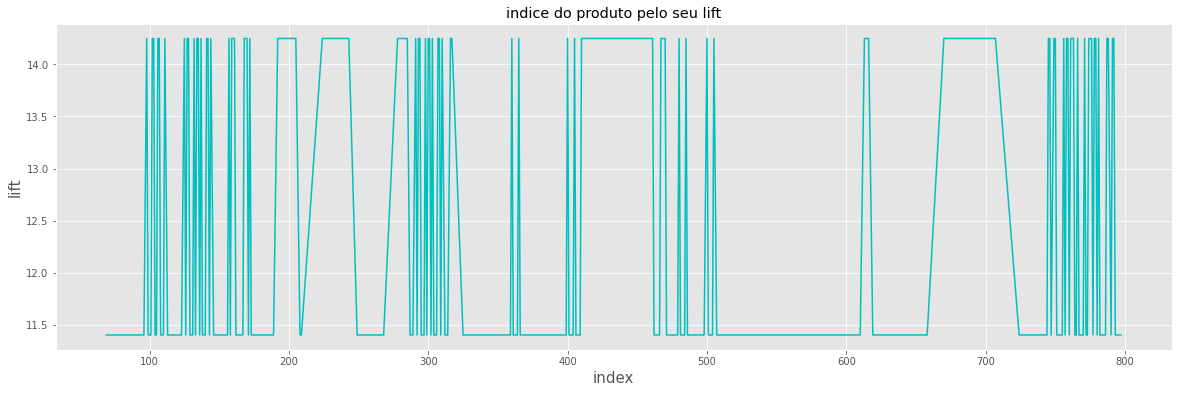

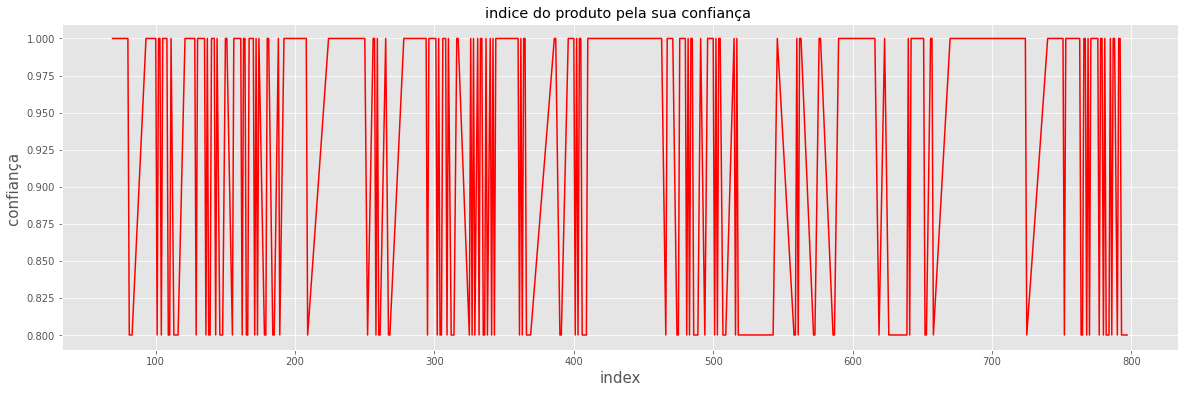

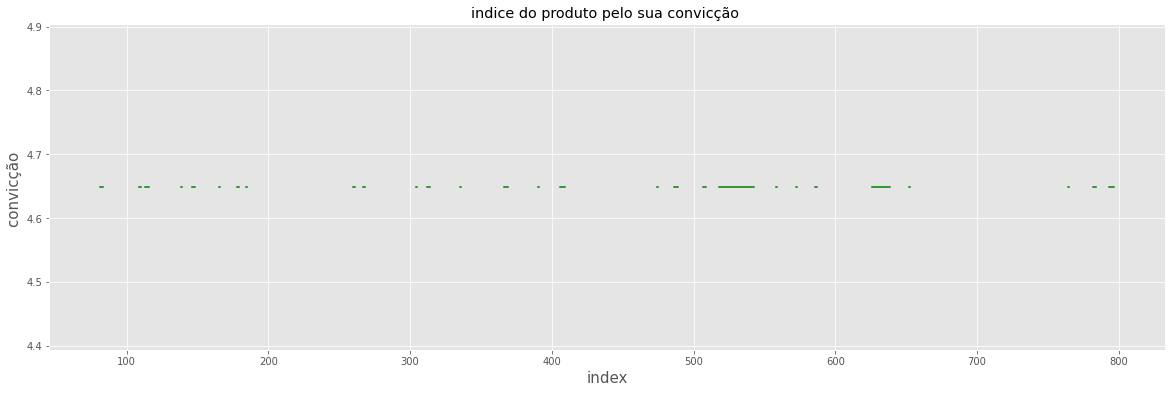

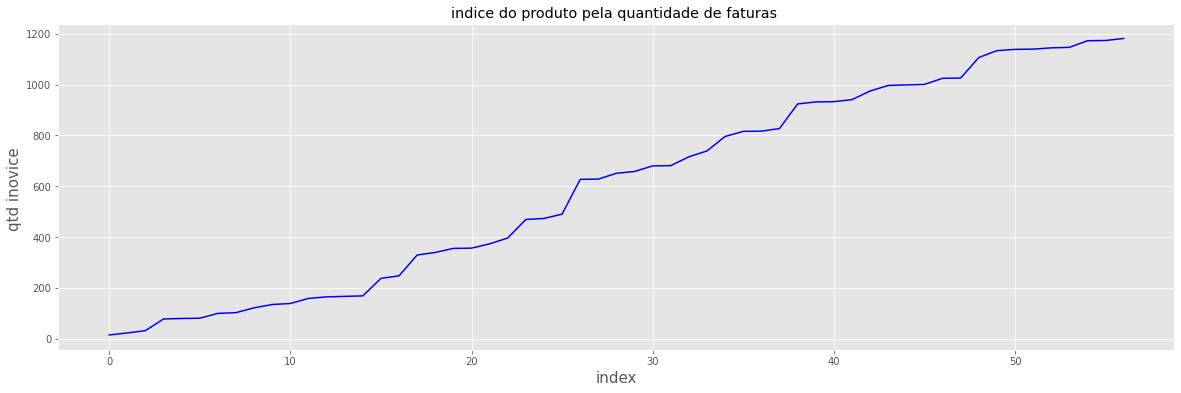

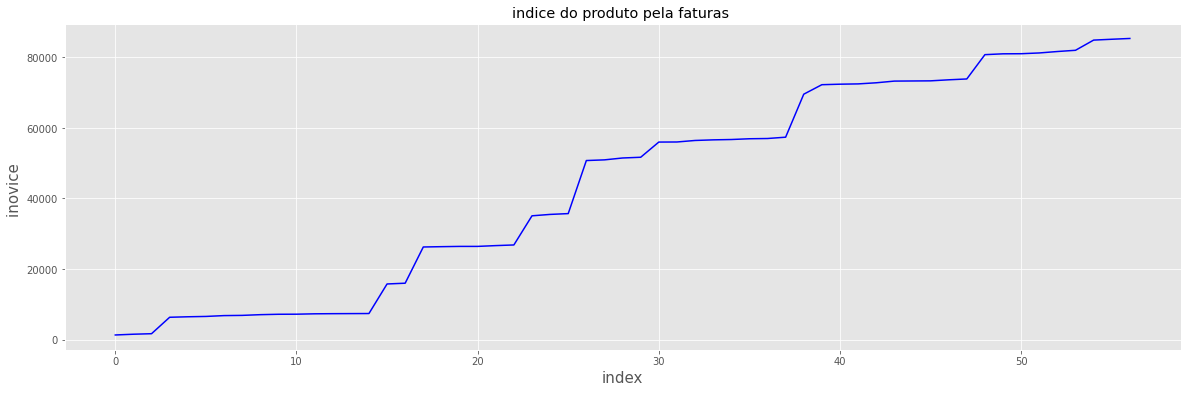

(1185,)


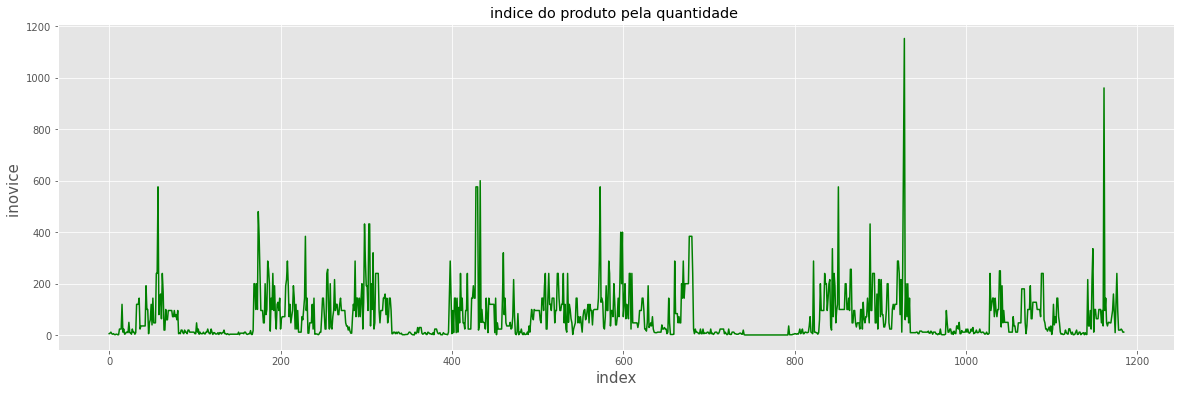

In [19]:
#plotando indice do produto pelp lift
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot(valueAustralia['index'], valueAustralia['lift'], color='c')
plt.xlabel('index', fontsize=15)
plt.ylabel('lift', fontsize=15)
plt.title('indice do produto pelo seu lift')
plt.show()

#plotando indice do produto pelp confidence
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot(valueAustralia['index'], valueAustralia['confidence'], color='r')
plt.xlabel('index', fontsize=15)
plt.ylabel('confiança ', fontsize=15)
plt.title('indice do produto pela sua confiança ')
plt.show()

#plotando indice do produto pelp conviction
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( valueAustralia['index'],valueAustralia['conviction'], color='g')
plt.xlabel('index', fontsize=15)
plt.ylabel('convicção ', fontsize=15)
plt.title('indice do produto pelo sua convicção ')
plt.show()

valores =[]
indice = []
valores2=[]

cont =0
for i in range(57):
  for j in range(basketAustralia.values[i].size):
    if basketAustralia.values[i][j] != 0:
      cont = cont+1
  valores.append(cont)
  indice.append(i)  
  #print('quantity inovice' ,i,':' , cont)
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indice,valores, color='b')
plt.xlabel('index', fontsize=15)
plt.ylabel('qtd inovice ', fontsize=15)
plt.title('indice do produto pela quantidade de faturas ')
plt.show()    

for i in range(57):
  for j in range(basketAustralia.values[i].size):
    if basketAustralia.values[i][j] != 0:
      cont = cont+basketAustralia.values[i][j]
  valores2.append(cont)
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indice,valores2, color='b')
plt.xlabel('index', fontsize=15)
plt.ylabel('inovice ', fontsize=15)
plt.title('indice do produto pela faturas ')
plt.show()  

indiceQtd = []
qtd = (df[df['Country'] =="Australia"]['Quantity'])
#qtdreset = qtd.reset_index()
#qtdreset2 = qtdreset.reset_index()
print(qtd.shape)
for i in range(qtd.shape[0]):
 indiceQtd.append(i)

plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indiceQtd,qtd, color='g')
plt.xlabel('index', fontsize=15)
plt.ylabel('inovice ', fontsize=15)
plt.title('indice do produto pela quantidade ')
plt.show()
#plotando indice do produto pelp lift
#matplotlib.pyplot.plot(value['index'],value['confidence'] )
#matplotlib.pyplot.show()

#print(values)

-Italy

In [20]:
basketItaly = (df[df['Country'] =="Italy"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basketItaly

Description,12 EGG HOUSE PAINTED WOOD,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 GARDENIA MORRIS BOXED CANDLES,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 FOIL HEART CAKE CASES,5 HOOK HANGER RED MAGIC TOADSTOOL,6 CHOCOLATE LOVE HEART T-LIGHTS,6 EGG HOUSE PAINTED WOOD,6 GIFT TAGS VINTAGE CHRISTMAS,72 SWEETHEART FAIRY CAKE CASES,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,APRON APPLE DELIGHT,ASSORTED COLOUR BIRD ORNAMENT,ASSORTED COLOUR MINI CASES,ASSORTED COLOURS SILK FAN,BAG 125g SWIRLY MARBLES,BAKING MOULD CHOCOLATE CUPCAKES,BAKING SET 9 PIECE RETROSPOT,BAKING SET SPACEBOY DESIGN,BATH BUILDING BLOCK WORD,BEWARE OF THE CAT METAL SIGN,BIG DOUGHNUT FRIDGE MAGNETS,BINGO SET,BIRDS MOBILE VINTAGE DESIGN,BISCUIT TIN 50'S CHRISTMAS,BLACK/BLUE POLKADOT UMBRELLA,BLUE FLOCK GLASS CANDLEHOLDER,BLUE HAPPY BIRTHDAY BUNTING,BLUE POLKADOT WRAP,BOTTLE BAG RETROSPOT,BOUDOIR SQUARE TISSUE BOX,BOX OF 6 MINI 50'S CRACKERS,...,TRADITIONAL CHRISTMAS RIBBONS,TRADITIONAL KNITTING NANCY,TRADITIONAL WOODEN SKIPPING ROPE,TRADTIONAL ALPHABET STAMP SET,TREASURE ISLAND BOOK BOX,TV DINNER TRAY AIR HOSTESS,TV DINNER TRAY DOLLY GIRL,VICTORIAN GLASS HANGING T-LIGHT,VICTORIAN SEWING KIT,VINTAGE BILLBOARD LOVE/HATE MUG,VINTAGE CHRISTMAS GIFT SACK,VINTAGE CREAM CAT FOOD CONTAINER,VINTAGE CREAM DOG FOOD CONTAINER,VINTAGE DOILY DELUXE SEWING KIT,VINTAGE DOILY JUMBO BAG RED,VINTAGE DOILY TRAVEL SEWING KIT,VINTAGE UNION JACK CUSHION COVER,VINTAGE UNION JACK DOORSTOP,VINTAGE UNION JACK MEMOBOARD,VINTAGE UNION JACK SHOPPING BAG,WATERING CAN BLUE ELEPHANT,WATERING CAN GREEN DINOSAUR,WELCOME WOODEN BLOCK LETTERS,WHITE BAROQUE WALL CLOCK,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOOD S/3 CABINET ANT WHITE FINISH,WOODEN CROQUET GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODLAND HEIGHT CHART STICKERS,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WRAP DOILEY DESIGN,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP RED APPLES,WRAP RED VINTAGE DOILY,YOU'RE CONFUSING ME METAL SIGN,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
537022,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544399,0.0,0.0,0.0,0.0,0

In [25]:
import matplotlib.pyplot
import matplotlib.pyplot as plt

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basketItaly.applymap(encode_units)

frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
#print(frequent_itemsets.sort_values(by='support',ascending=False))
#K-itensets ordenado por support
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support',ascending=False)
#print(frequent_itemsets_sorted)
rules = association_rules(frequent_itemsets_sorted, metric="lift", min_threshold=1)
#rules.head()
#rules.shape = (800,9)
actual_rules = rules[ (rules['lift'] >= 9) & (rules['confidence'] >= 0.6) ]
#print(actual_rules.sort_values(['lift', 'confidence']))
actual_rules_sorted = actual_rules.sort_values(['lift', 'confidence'],ascending=False)
#actual_rules_sorted.head()
actual_rules_sorted_reset = actual_rules_sorted.reset_index()    
valueItaly = actual_rules_sorted_reset.sort_values(by='index')
#print(value)
print('numero de regras = ', valueItaly.shape, '\n')

print("Produtos mais comprados em conjunto", '\n')

for i in range(valueItaly.shape[0]):
  print("Antecedente: ",valueItaly['antecedents'][i])
  print("Consequente: ", valueItaly['consequents'][i])
  print("lift: ",valueItaly['lift'][i])
  print("confianca: ", valueItaly['confidence'][i])
  print("indice: ", valueItaly['index'][i])
  print('\n')



numero de regras =  (546, 10) 

Produtos mais comprados em conjunto 

Antecedente:  frozenset({'JUMBO BAG WOODLAND ANIMALS', 'RECYCLING BAG RETROSPOT'})
Consequente:  frozenset({'JUMBO BAG TOYS'})
lift:  12.666666666666668
confianca:  1.0
indice:  126


Antecedente:  frozenset({'JUMBO BAG TOYS'})
Consequente:  frozenset({'JUMBO BAG WOODLAND ANIMALS', 'RECYCLING BAG RETROSPOT'})
lift:  12.666666666666668
confianca:  1.0
indice:  127


Antecedente:  frozenset({'JUMBO BAG WOODLAND ANIMALS', 'TOY TIDY PINK POLKADOT'})
Consequente:  frozenset({'JUMBO BAG TOYS'})
lift:  12.666666666666668
confianca:  1.0
indice:  132


Antecedente:  frozenset({'JUMBO BAG TOYS'})
Consequente:  frozenset({'JUMBO BAG WOODLAND ANIMALS', 'TOY TIDY PINK POLKADOT'})
lift:  12.666666666666668
confianca:  1.0
indice:  133


Antecedente:  frozenset({'JUMBO BAG WOODLAND ANIMALS', 'TOY TIDY SPACEBOY'})
Consequente:  frozenset({'JUMBO BAG TOYS'})
lift:  12.666666666666668
confianca:  1.0
indice:  138


Antecedente:  froz

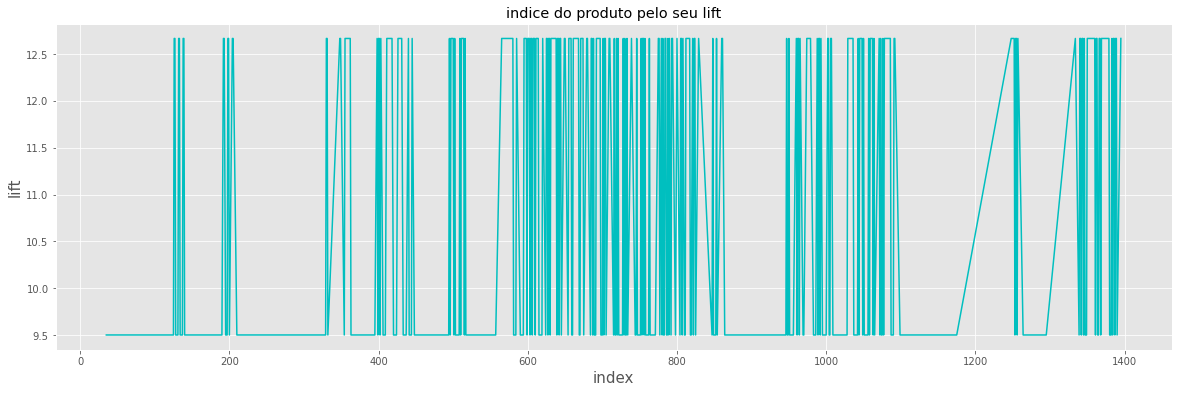

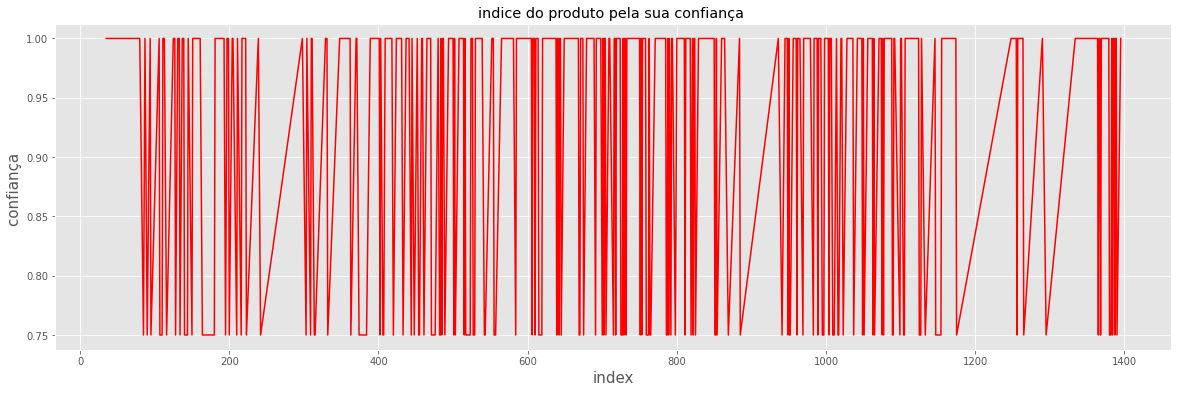

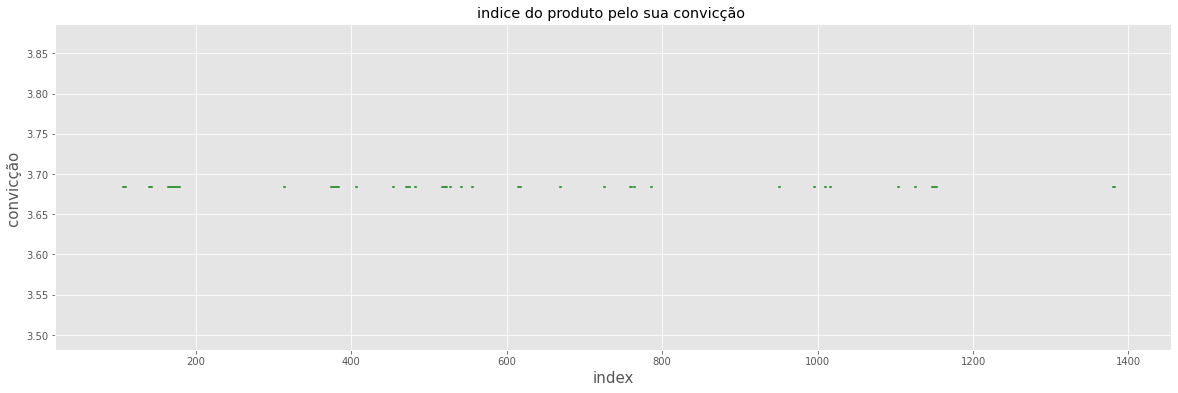

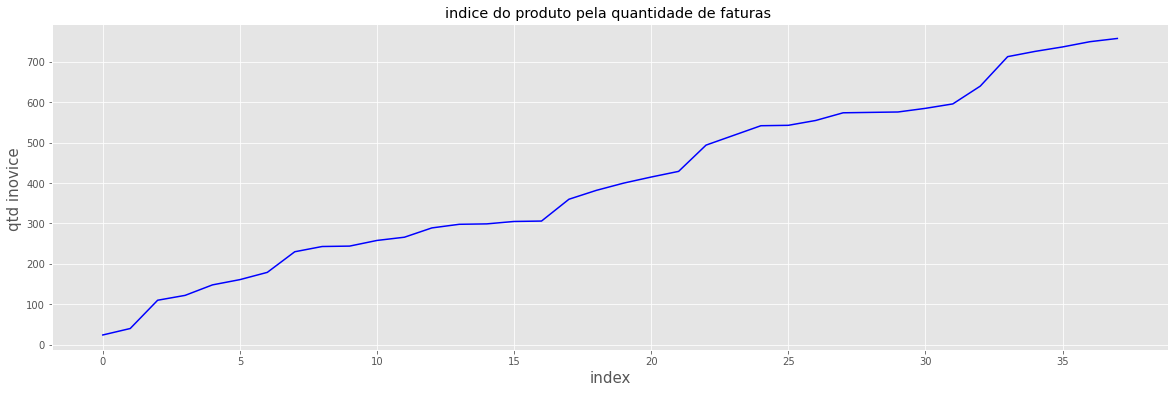

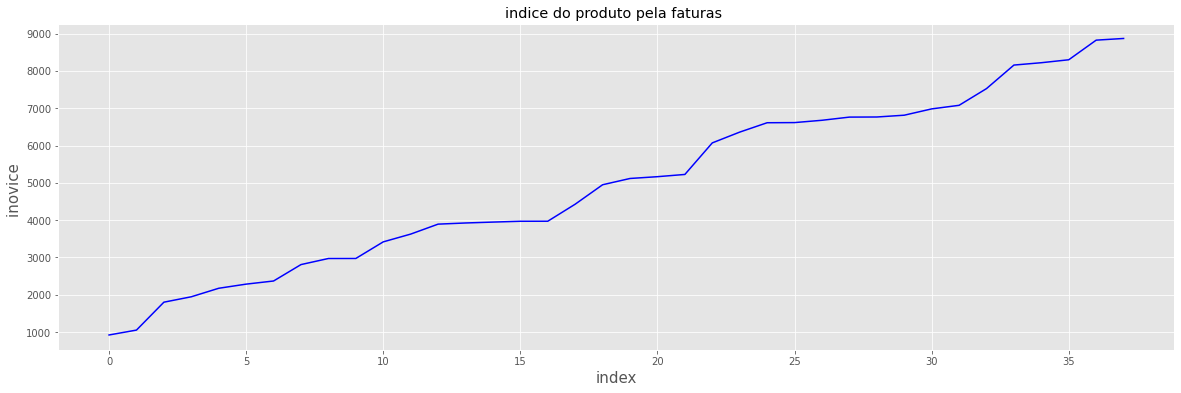

(758,)


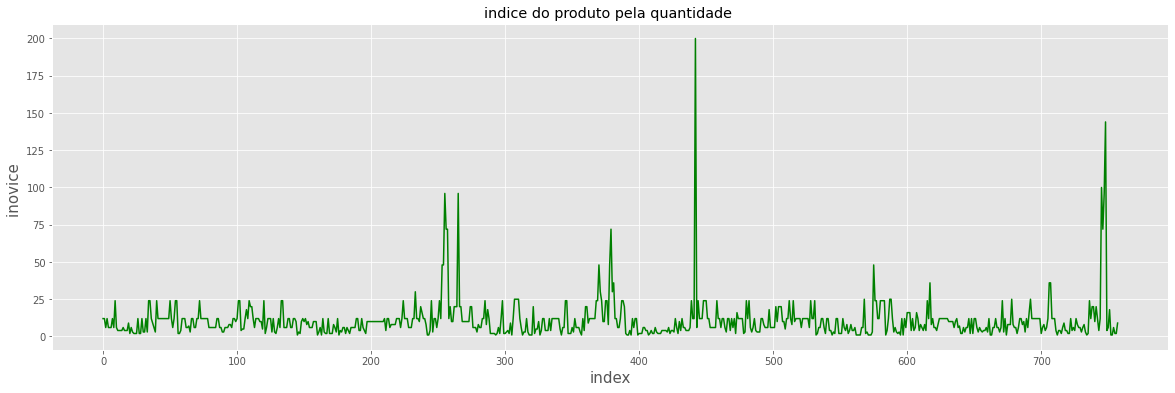

In [26]:
#plotando indice do produto pelp lift
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot(valueItaly['index'], valueItaly['lift'], color='c')
plt.xlabel('index', fontsize=15)
plt.ylabel('lift', fontsize=15)
plt.title('indice do produto pelo seu lift')
plt.show()

#plotando indice do produto pelp confidence
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot(valueItaly['index'], valueItaly['confidence'], color='r')
plt.xlabel('index', fontsize=15)
plt.ylabel('confiança ', fontsize=15)
plt.title('indice do produto pela sua confiança ')
plt.show()

#plotando indice do produto pelp conviction
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( valueItaly['index'],valueItaly['conviction'], color='g')
plt.xlabel('index', fontsize=15)
plt.ylabel('convicção ', fontsize=15)
plt.title('indice do produto pelo sua convicção ')
plt.show()

valores =[]
indice = []
valores2=[]
cont =0
for i in range(38):
  for j in range(basketItaly.values[i].size):
    if basketItaly.values[i][j] != 0:
      cont = cont+1
  valores.append(cont)
  indice.append(i)  
  #print('quantity inovice' ,i,':' , cont)
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indice,valores, color='b')
plt.xlabel('index', fontsize=15)
plt.ylabel('qtd inovice ', fontsize=15)
plt.title('indice do produto pela quantidade de faturas ')
plt.show()    

for i in range(38):
  for j in range(basketItaly.values[i].size):
    if basketItaly.values[i][j] != 0:
      cont = cont+basketItaly.values[i][j]
  valores2.append(cont)
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indice,valores2, color='b')
plt.xlabel('index', fontsize=15)
plt.ylabel('inovice ', fontsize=15)
plt.title('indice do produto pela faturas ')
plt.show()    

indiceQtd = []
qtd = (df[df['Country'] =="Italy"]['Quantity'])
#qtdreset = qtd.reset_index()
#qtdreset2 = qtdreset.reset_index()
print(qtd.shape)
for i in range(qtd.shape[0]):
 indiceQtd.append(i)

plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indiceQtd,qtd, color='g')
plt.xlabel('index', fontsize=15)
plt.ylabel('inovice ', fontsize=15)
plt.title('indice do produto pela quantidade ')
plt.show()

Hong kong

In [27]:
basketHK = (df[df['Country'] =='Hong Kong']
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basketHK

Description,10 COLOUR SPACEBOY PEN,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,4 TRADITIONAL SPINNING TOPS,60 CAKE CASES DOLLY GIRL DESIGN,60 TEATIME FAIRY CAKE CASES,ADVENT CALENDAR GINGHAM SACK,APPLE BATH SPONGE,ASSORTED COLOUR LIZARD SUCTION HOOK,ASSORTED COLOUR MINI CASES,ASSORTED MONKEY SUCTION CUP HOOK,BAKING SET 9 PIECE RETROSPOT,BAKING SET SPACEBOY DESIGN,BASKET OF TOADSTOOLS,BATHROOM SET LOVE HEART DESIGN,BIG DOUGHNUT FRIDGE MAGNETS,BIRDS MOBILE VINTAGE DESIGN,BLUE & WHITE BREAKFAST TRAY,BLUE 3 PIECE POLKADOT CUTLERY SET,BLUE OWL SOFT TOY,BLUE PARTY BAGS,BLUE POLKADOT BOWL,BLUE POLKADOT CUP,BLUE POLKADOT PLATE,BOX OF VINTAGE ALPHABET BLOCKS,CABIN BAG VINTAGE PAISLEY,CABIN BAG VINTAGE RETROSPOT,CANDY SPOT CUSHION COVER,CANDY SPOT HAND BAG,CARD CIRCUS PARADE,CHARLIE & LOLA WASTEPAPER BIN BLUE,CHARLIE & LOLA WASTEPAPER BIN FLORA,CHARLIE + LOLA BISCUITS TINS,CHARLOTTE BAG APPLES DESIGN,CHARLOTTE BAG PINK POLKADOT,CHERRY BLOSSOM TABLE CLOCK,CHILDRENS APRON SPACEBOY DESIGN,...,RETROSPOT TEA SET CERAMIC 11 PC,ROSE DU SUD OVEN GLOVE,ROUND SNACK BOXES SET OF 4 FRUITS,ROUND SNACK BOXES SET OF 4 SKULLS,ROUND SNACK BOXES SET OF4 WOODLAND,SET 2 PANTRY DESIGN TEA TOWELS,SET 2 TEA TOWELS I LOVE LONDON,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",SET 6 SCHOOL MILK BOTTLES IN CRATE,SET OF 2 TEA TOWELS APPLE AND PEARS,SET OF 3 REGENCY CAKE TINS,SET OF 6 CAKE CHOPSTICKS,SET OF 6 HEART CHOPSTICKS,SET OF 6 SOLDIER SKITTLES,SET OF 6 STRAWBERRY CHOPSTICKS,SET OF TEA COFFEE SUGAR TINS PANTRY,SET/2 RED RETROSPOT TEA TOWELS,SILVER TEDDY BEAR,SKULLS PARTY BAG + STICKER SET,SMALL HEART MEASURING SPOONS,SNOWFLAKE PORTABLE TABLE LIGHT,SPACEBOY LUNCH BOX,STRAWBERRY BATH SPONGE,STRAWBERRY LUNCH BOX WITH CUTLERY,TEA BAG PLATE RED RETROSPOT,TEA TIME OVEN GLOVE,TOOL BOX SOFT TOY,TOY TIDY SPACEBOY,TRAVEL SEWING KIT,TUMBLER NEW ENGLAND,VINTAGE DONKEY TAIL GAME,VINTAGE HEADS AND TAILS CARD GAME,VINTAGE SNAKES & LADDERS,WATERING CAN GREEN DINOSAUR,WOODEN ADVENT CALENDAR RED,WOODEN OWLS LIGHT GARLAND,WOODLAND HEIGHT CHART STICKERS,WOODLAND CHARLOTTE BAG,WOODLAND PARTY BAG + STICKER SET,WORLD WAR 2 GLIDERS ASSTD DESIGNS
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
541975,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,10.0,0.0,24.0,48.0,0.0,0.0,12.0,6.0,0.0,0.0,0.0,24.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,96.0,0.0,0.0,4.0,0.0,0.0,0.0,48.0,48.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,25.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549738,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,30.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,24.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,3.0,4.0,0.0,6.0,6.0,32.0,32.0,40.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,12.0,10.0,10.0,2.0,0.0,...,6.0,6.0,0.0,0.0,6.0,6.0,6.0,4.0,0.0,6.0,0.0,0.0,12.0,0.0,10.0,0.0,6.0,0.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,10.0,8.0,0.0
557675,48.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0
56

In [ ]:
basket['12 PENCILS TALL TUBE RED RETROSPOT'].values

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 12., 24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  0

In [28]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basketHK.applymap(encode_units)
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
#print(frequent_itemsets.sort_values(by='support',ascending=False))
#K-itensets ordenado por support
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support',ascending=False)
#print(frequent_itemsets_sorted)
rules = association_rules(frequent_itemsets_sorted, metric="lift", min_threshold=1)
#rules.head()
#rules.shape = (800,9)
actual_rules = rules[ (rules['lift'] >= 11) & (rules['confidence'] >= 0.8) ]
#print(actual_rules.sort_values(['lift', 'confidence']))
actual_rules_sorted = actual_rules.sort_values(['lift', 'confidence'],ascending=False)
#actual_rules_sorted.head()
actual_rules_sorted_reset = actual_rules_sorted.reset_index()    
valueHK = actual_rules_sorted_reset.sort_values(by='index')
#print(value)
print('numero de regras = ', value.shape, '\n')

print("Produtos mais comprados em conjunto", '\n')

for i in range(valueHK.shape[0]):
  print("Antecedente: ",valueHK['antecedents'][i])
  print("Consequente: ", valueHK['consequents'][i])
  print("lift: ",valueHK['lift'][i])
  print("confianca: ", valueHK['confidence'][i])
  print("indice: ", valueHK['index'][i])
  print('\n')


KeyboardInterrupt: ignored

In [ ]:
#plotando indice do produto pelp lift
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot(valueHK['index'], valueHK['lift'], color='c')
plt.xlabel('index', fontsize=15)
plt.ylabel('lift', fontsize=15)
plt.title('indice do produto pelo seu lift')
plt.show()

#plotando indice do produto pelp confidence
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot(valueHK['index'], valueHK['confidence'], color='r')
plt.xlabel('index', fontsize=15)
plt.ylabel('confiança ', fontsize=15)
plt.title('indice do produto pela sua confiança ')
plt.show()

#plotando indice do produto pelp conviction
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( valueHK['index'],valueHK['conviction'], color='g')
plt.xlabel('index', fontsize=15)
plt.ylabel('convicção ', fontsize=15)
plt.title('indice do produto pelo sua convicção ')
plt.show()

valores =[]
indice = []
valores2=[]

cont =0
for i in range(19):
  for j in range(basketHK.values[i].size):
    if basketHK.values[i][j] != 0:
      cont = cont+1
  valores.append(cont)
  indice.append(i)  
  #print('quantity inovice' ,i,':' , cont)
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indice,valores, color='b')
plt.xlabel('index', fontsize=15)
plt.ylabel('qtd inovice ', fontsize=15)
plt.title('indice do produto pela quantidade de faturas ')
plt.show()    

for i in range(19):
  for j in range(basketHK.values[i].size):
    if basketHK.values[i][j] != 0:
      cont = cont+basketHK.values[i][j]
  valores2.append(cont)
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indice,valores2, color='b')
plt.xlabel('index', fontsize=15)
plt.ylabel('inovice ', fontsize=15)
plt.title('indice do produto pela faturas ')
plt.show()  

indiceQtd = []
qtd = (df[df['Country'] =='Hong Kong']['Quantity'])
#qtdreset = qtd.reset_index()
#qtdreset2 = qtdreset.reset_index()
print(qtd.shape)
for i in range(qtd.shape[0]):
 indiceQtd.append(i)

plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indiceQtd,qtd, color='g')
plt.xlabel('index', fontsize=15)
plt.ylabel('inovice ', fontsize=15)
plt.title('indice do produto pela quantidade ')
plt.show()

(321,)


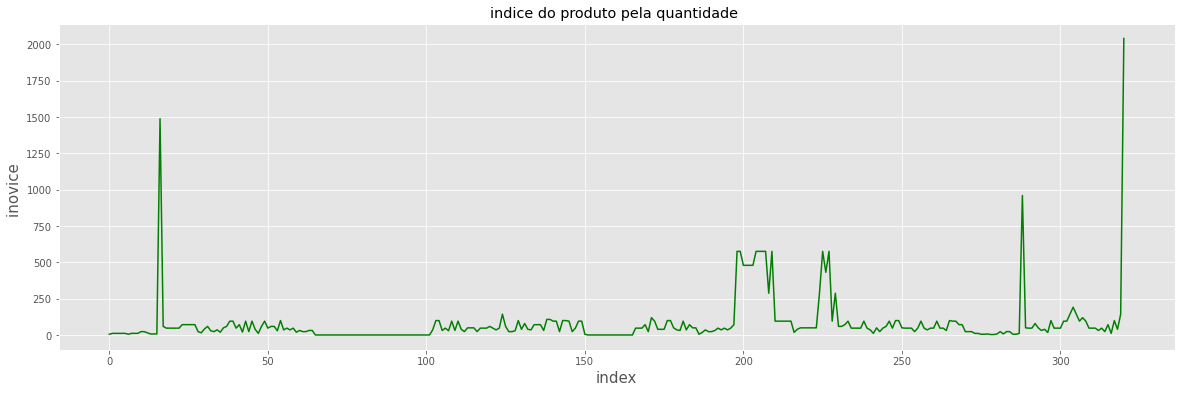

In [ ]:
indiceQtd = []
qtd = (df[df['Country'] =="Japan"]['Quantity'])
#qtdreset = qtd.reset_index()
#qtdreset2 = qtdreset.reset_index()
print(qtd.shape)
for i in range(qtd.shape[0]):
 indiceQtd.append(i)

plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indiceQtd,qtd, color='g')
plt.xlabel('index', fontsize=15)
plt.ylabel('inovice ', fontsize=15)
plt.title('indice do produto pela quantidade ')
plt.show()

United Kingdom

In [29]:
basketUK = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basketUK

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,20713,20713 wrongly marked,3 BIRDS CANVAS SCREEN,3 BLACK CATS W HEARTS BLANK CARD,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,...,sold as set on dotcom,sold as set on dotcom and amazon,sold as set/6 by dotcom,sold in set?,sold with wrong barcode,stock check,stock creditted wrongly,taig adjust,taig adjust no stock,temp adjustment,test,throw away,thrown away,thrown away-can't sell,thrown away-can't sell.,to push order througha s stock was,water damage,water damaged,website fixed,wet,wet boxes,wet damaged,wet pallet,wet rusty,wet/rusty,wet?,wrong barcode,wrong barcode (22467),wrong code,wrong code?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [30]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basketUK.applymap(encode_units)
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
#print(frequent_itemsets.sort_values(by='support',ascending=False))
#K-itensets ordenado por support
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support',ascending=False)
#print(frequent_itemsets_sorted)
rules = association_rules(frequent_itemsets_sorted, metric="lift", min_threshold=1)
#rules.head()
#rules.shape = (800,9)
actual_rules = rules[ (rules['lift'] >= 9) & (rules['confidence'] >= 0.8) ]
#print(actual_rules.sort_values(['lift', 'confidence']))
actual_rules_sorted = actual_rules.sort_values(['lift', 'confidence'],ascending=False)
#actual_rules_sorted.head()
actual_rules_sorted_reset = actual_rules_sorted.reset_index()    
valueUK = actual_rules_sorted_reset.sort_values(by='index')
#print(value)
print('numero de regras = ', valueUK.shape, '\n')

print("Produtos mais comprados em conjunto", '\n')

for i in range(valueUK.shape[0]):
  print("Antecedente: ",valueUK['antecedents'][i])
  print("Consequente: ", valueUK['consequents'][i])
  print("lift: ",valueUK['lift'][i])
  print("confianca: ", valueUK['confidence'][i])
  print("indice: ", valueUK['index'][i])
  print('\n')


numero de regras =  (0, 10) 

Produtos mais comprados em conjunto 



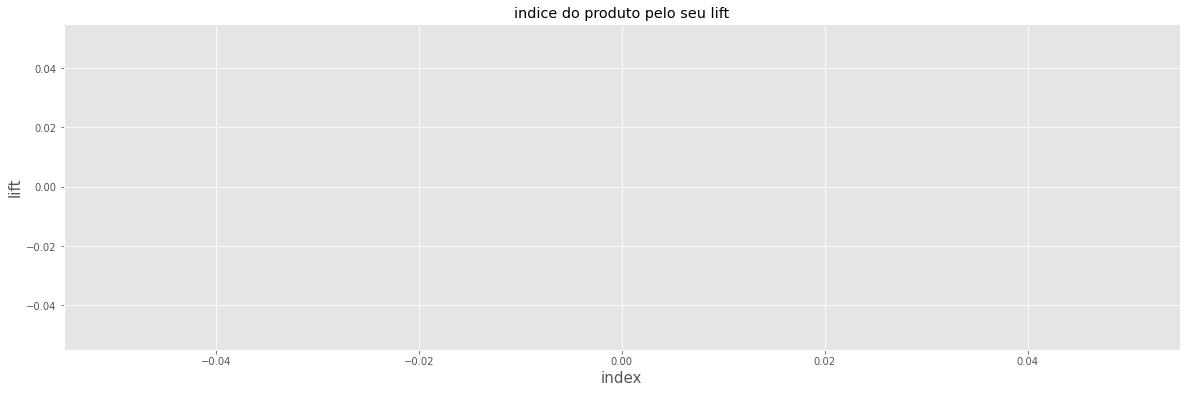

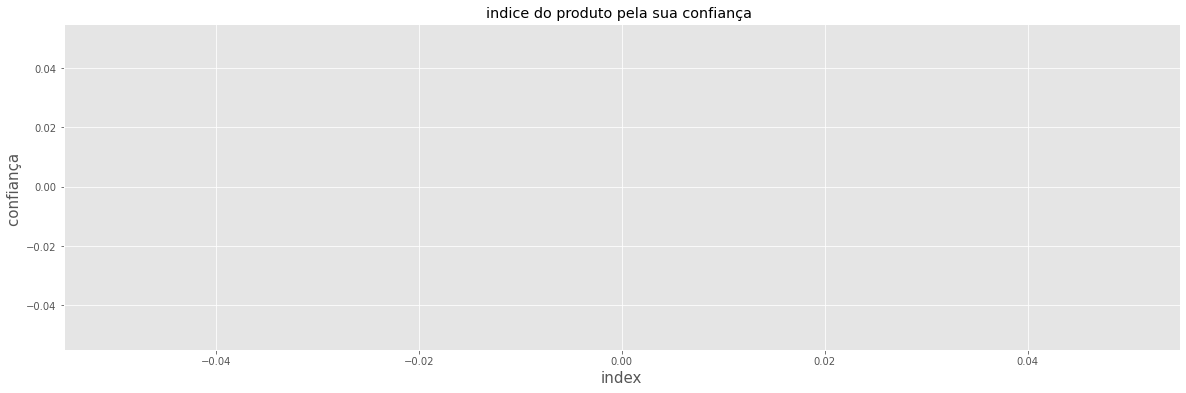

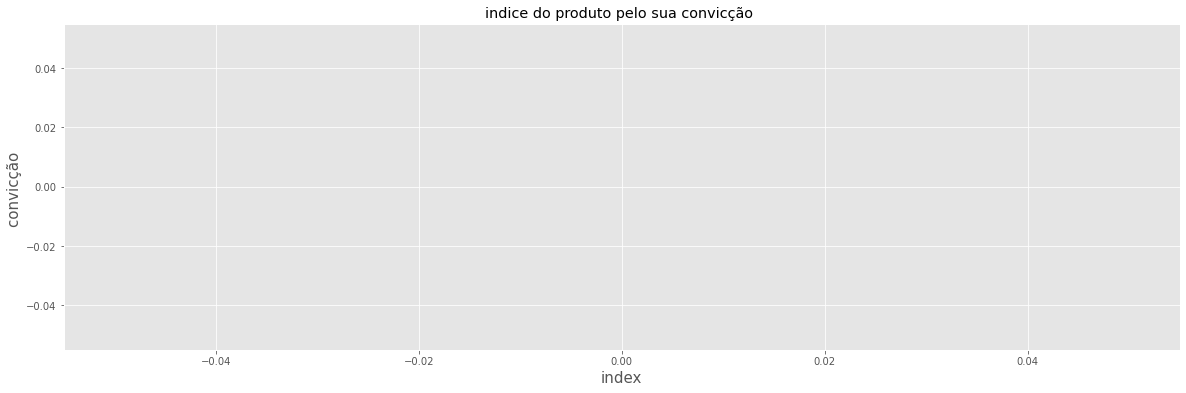

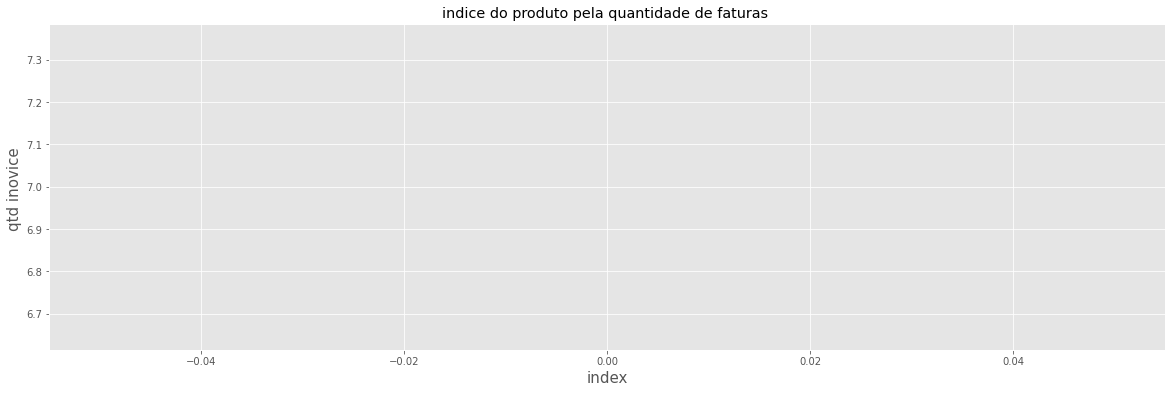

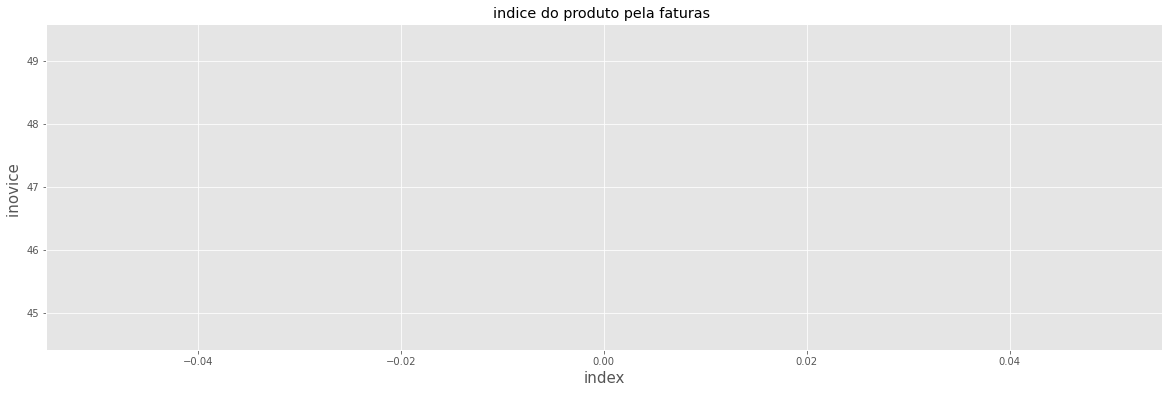

(487622,)


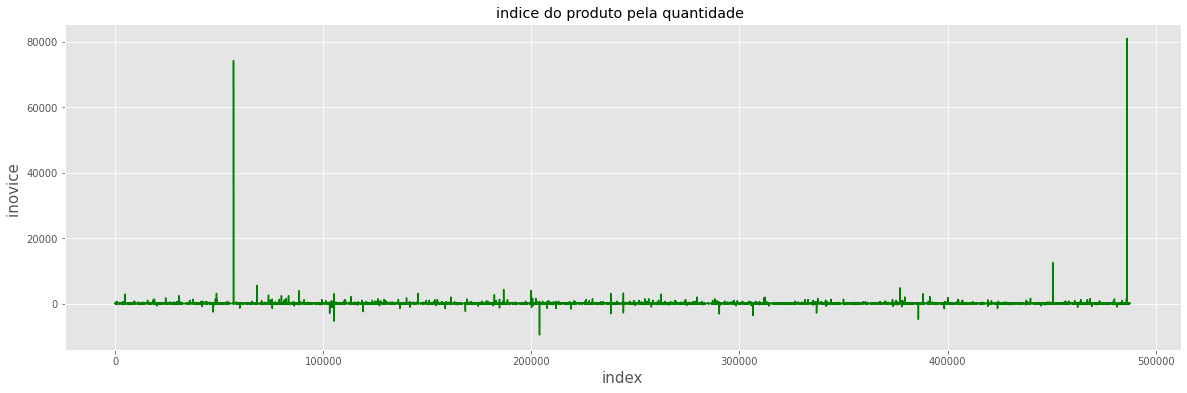

In [31]:
#plotando indice do produto pelp lift
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot(valueUK['index'], valueUK['lift'], color='c')
plt.xlabel('index', fontsize=15)
plt.ylabel('lift', fontsize=15)
plt.title('indice do produto pelo seu lift')
plt.show()

#plotando indice do produto pelp confidence
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot(valueUK['index'], valueUK['confidence'], color='r')
plt.xlabel('index', fontsize=15)
plt.ylabel('confiança ', fontsize=15)
plt.title('indice do produto pela sua confiança ')
plt.show()

#plotando indice do produto pelp conviction
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( valueUK['index'],valueUK['conviction'], color='g')
plt.xlabel('index', fontsize=15)
plt.ylabel('convicção ', fontsize=15)
plt.title('indice do produto pelo sua convicção ')
plt.show()

valores =[]
indice = []
valores2=[]

cont =0
for i in range(1):
  for j in range(basketUK.values[i].size):
    if basketUK.values[i][j] != 0:
      cont = cont+1
  valores.append(cont)
  indice.append(i)  
  #print('quantity inovice' ,i,':' , cont)
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indice,valores, color='b')
plt.xlabel('index', fontsize=15)
plt.ylabel('qtd inovice ', fontsize=15)
plt.title('indice do produto pela quantidade de faturas ')
plt.show()    

for i in range(1):
  for j in range(basketUK.values[i].size):
    if basketUK.values[i][j] != 0:
      cont = cont+basketUK.values[i][j]
  valores2.append(cont)
plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indice,valores2, color='b')
plt.xlabel('index', fontsize=15)
plt.ylabel('inovice ', fontsize=15)
plt.title('indice do produto pela faturas ')
plt.show()  

indiceQtd = []
qtd = (df[df['Country'] =="United Kingdom"]['Quantity'])
#qtdreset = qtd.reset_index()
#qtdreset2 = qtdreset.reset_index()
print(qtd.shape)
for i in range(qtd.shape[0]):
 indiceQtd.append(i)

plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indiceQtd,qtd, color='g')
plt.xlabel('index', fontsize=15)
plt.ylabel('inovice ', fontsize=15)
plt.title('indice do produto pela quantidade ')
plt.show()

Uma coisa interessante a se observar no reino Unido é seu alto consumo, entretando a quantidade de compras casadas é quase nula ou insignificante

(487622,)


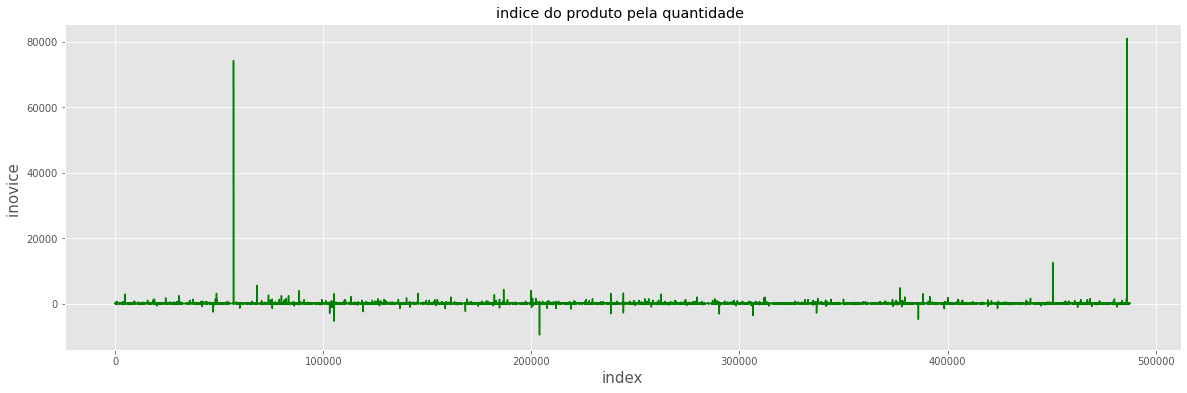

In [ ]:
indiceQtd = []
qtd = (df[df['Country'] =="United Kingdom"]['Quantity'])
#qtdreset = qtd.reset_index()
#qtdreset2 = qtdreset.reset_index()
print(qtd.shape)
for i in range(qtd.shape[0]):
 indiceQtd.append(i)

plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot')
plt.plot( indiceQtd,qtd, color='g')
plt.xlabel('index', fontsize=15)
plt.ylabel('inovice ', fontsize=15)
plt.title('indice do produto pela quantidade ')
plt.show()

**Conclusao**

Com essa analize podemos ter noção do consumo de contas casadas dos paises acima citados.
A australia  por exemplo possui um maior consumo em lanches e quase todos os consummos de lanches sao casados com velas perfumadas, na australia temos um lift superior a 14 e confianca de 100% em grande parte dos casos, o que mostra grande recorrencia em tais compras, no entanto tambem temos uma quantidade consideravel de regras de produtos 346.
Ja a italia tem seu maior consumo de produto em bolsas e normalmente quem compra bolsas compra mais de uma, o que ocasiona em muitas compras casadas desses tipos de itens, la temos um lift superior a 19 e na maioria dos casos confianca de 100%, que assim como na Australia mostra recorrencia em tais compras casadas,na italia temos um pouco menos de regras de produtos 256.
Dos paises acima visto, o Brazil é o menos consumista, mas quanto a isso pdemos levar em conta o poder aquisitivo do pais, enquanto o mais consumista temos o Reino Unido,  e podemos facilmente analizar o poder de conta de um pais por esses dados onde se formos ranquear teremos em primeiro lugar UK, seguido pela Italia, Hong Kong e Australia 

Em ambos citados acima, temos um grande numero de regras de produtos pois, temos um lift muito alto com uma confianca muito alta tambem, o que mostra 